#  Box, Gaussion Kernels and Linear filters, Autocorrelation and Convolution


In [292]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread, imsave
import cv2
# from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from glob import glob

from logging import info
import logging
# logging.config
import typing
from typing import final





# Load Images

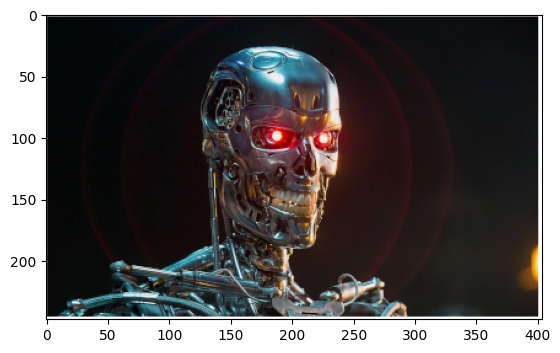

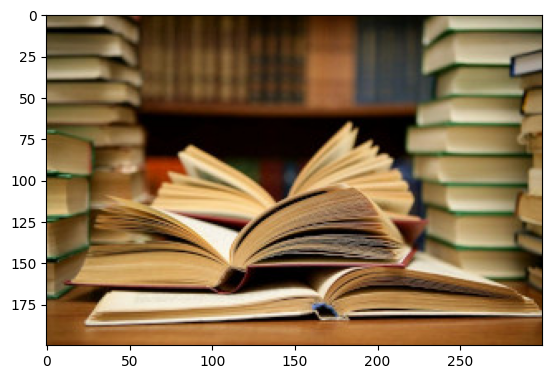

In [293]:
face=imread("./terminator.png")
face=face[:,:,0:3]
plt.figure()
imshow(face)

book=imread("./openbooks.jpg")
plt.figure()
imshow(book)


# Basic Kernels

In [294]:
# NoChangeKernel
nochange_kernel=np.zeros(3**2,dtype="int8").reshape(3,3)
nochange_kernel[1,1]=1.0
nochange_kernel

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]], dtype=int8)

In [295]:
box_kernel=np.ones(3**2,dtype="int8").reshape(3,3)
box_kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [296]:
gaussian_kernel=np.array([1,2,1,2,4,2,1,2,1],dtype="int8").reshape(3,3)
gaussian_kernel

array([[1, 2, 1],
       [2, 4, 2],
       [1, 2, 1]], dtype=int8)

In [297]:
edge_H_kernel=np.array([1,1,1,0,0,0,-1,-1,-1],dtype="int8").reshape(3,3)
edge_H_kernel

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]], dtype=int8)

In [298]:
edge_V_kernel=np.array([1,0,-1,1,0,-1,1,0,-1],dtype="int8").reshape(3,3)
edge_V_kernel

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]], dtype=int8)

In [299]:
edge_D_kernel=np.array([1,1,0,1,0,-1,0,-1,-1],dtype="int8").reshape(3,3)
edge_D_kernel

array([[ 1,  1,  0],
       [ 1,  0, -1],
       [ 0, -1, -1]], dtype=int8)

# Function to compute fft and plot it with image

In [304]:
def img2fft(img):
    fftimg=np.fft.fftshift(np.fft.fft2(img))
    abs_fftimg=np.log(np.abs(fftimg+1))
    return abs_fftimg

def plotwithfft(img,title="",cmap='gray'):
    if img.ndim>2:
        img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.figure()
    fig,ax=plt.subplots(1,2,figsize=(10,4))
    ax[0].imshow(img,cmap=cmap)
    ax[0].set_title("Image")
    ax[1].imshow(img2fft(img),cmap="gray",label="fft")
    
    ax[1].set_title("Image FFT")
#     ax[1].legend()
    fig.suptitle(title)

# Function to compute correlation with kernel

In [301]:
# Correlation Function
def correlationFn(*args):
    
    
    image=args[0]
    kernel=args[1]
    cmap='gray'
    
    # Get the dimensions of the image and kernel
    if len(args)>2:
        image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        img_rows, img_cols = image.shape
        channels=1
        R=image
        cmap=args[2]
    else:
        img_rows, img_cols, channels = image.shape
        R=image[:,:,0]
        
        
    k_rows, k_cols = kernel.shape
    
    
        
#     correlation=np.empty_like(R)
    for channel in np.arange(0,channels):
#         print(f"\n Processing channel is {channel}")
        if len(args)>2:
            imageChannel=image
        else:
            imageChannel=image[:,:,channel]
        
        # Create an empty array to hold the correlation result
        corr = np.zeros_like(R)

        # Pad the image with zeros
        padded_img = np.pad(imageChannel, ((k_rows//2, k_rows//2), (k_cols//2, k_cols//2)), mode='constant')

        # Loop through the image and perform correlation with the kernel
        for i in range(img_rows):
            for j in range(img_cols):
                corr[i, j] = np.sum(padded_img[i:i+k_rows, j:j+k_cols] * kernel)

        if channel==0:
            correlation=corr
        else:
            correlation=np.dstack((correlation, corr))
        
#     plt.figure
#     fig,ax=plt.subplots(1,3,figsize=(12,8))
    if len(args)>2:
        plotwithfft(kernal,"Kernel")
        plotwithfft(image,"Input Image")
        plotwithfft(correlation,"Correlated Image")
    else:
        plotwithfft(kernal,"Kernel")
        plotwithfft(image,"Input Image")
        plotwithfft(correlation,"Correlated Image")
        
    
    return correlation

# output=correlationFn(face, kernal)


[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


/tmp/ipykernel_47556/3344230057.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[[1 2 1]
 [2 4 2]
 [1 2 1]]
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[ 1  1  0]
 [ 1  0 -1]
 [ 0 -1 -1]]


<Figure size 640x480 with 0 Axes>

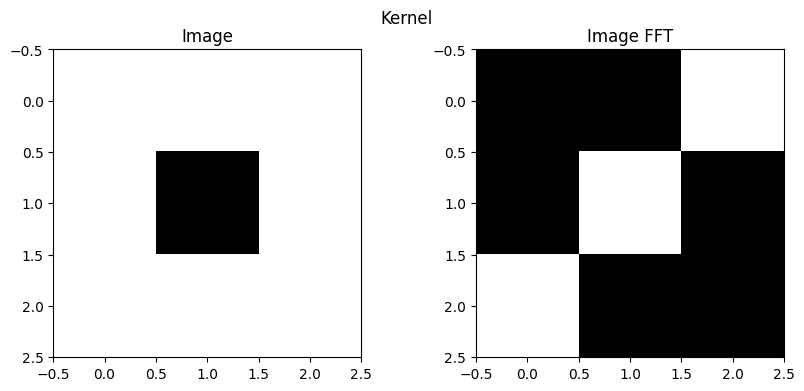

<Figure size 640x480 with 0 Axes>

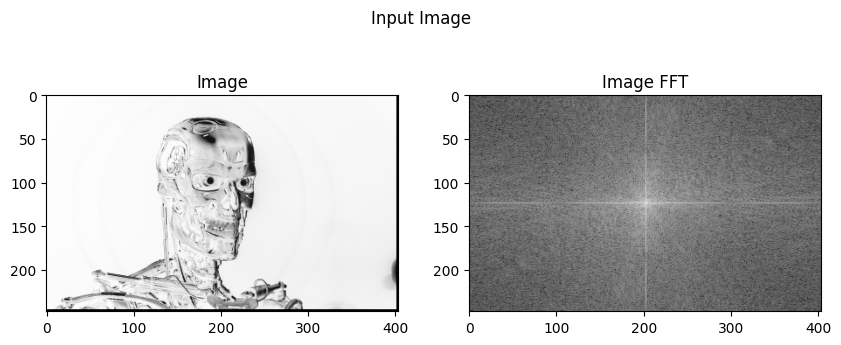

<Figure size 640x480 with 0 Axes>

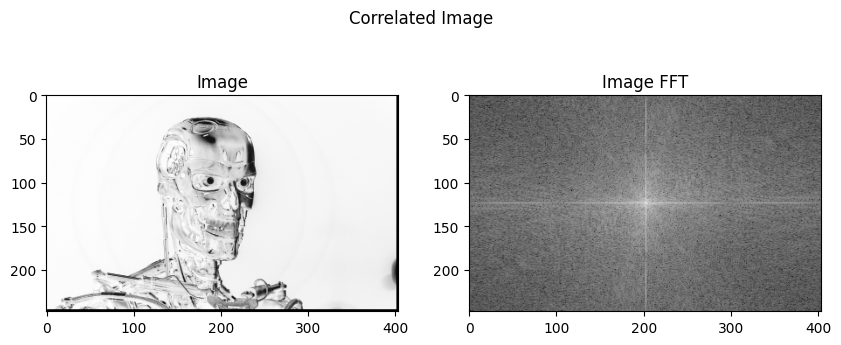

<Figure size 640x480 with 0 Axes>

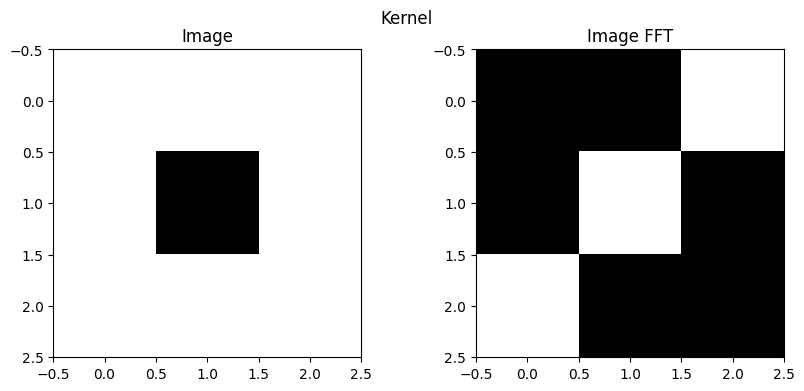

<Figure size 640x480 with 0 Axes>

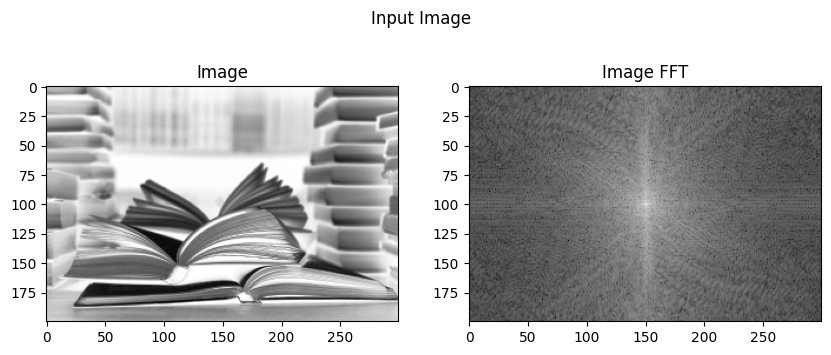

<Figure size 640x480 with 0 Axes>

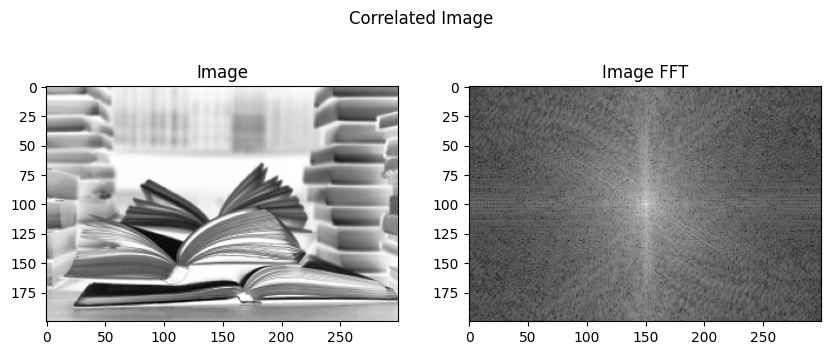

<Figure size 640x480 with 0 Axes>

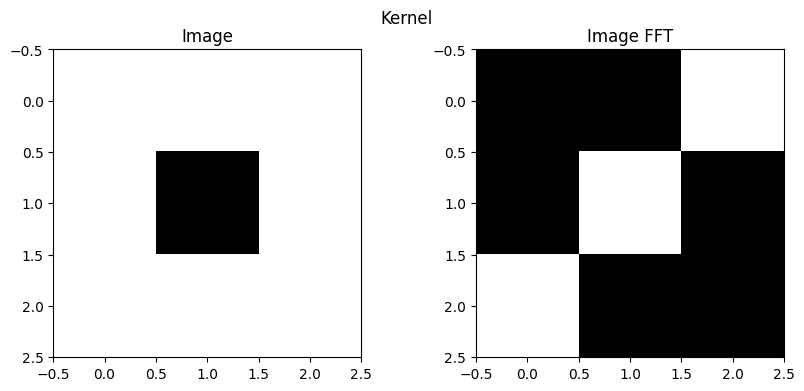

<Figure size 640x480 with 0 Axes>

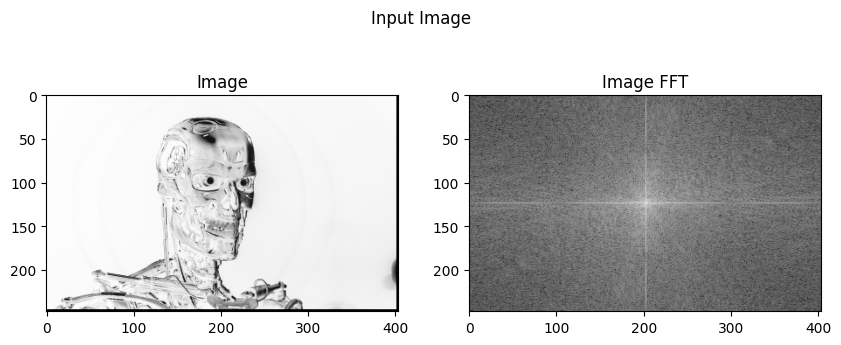

<Figure size 640x480 with 0 Axes>

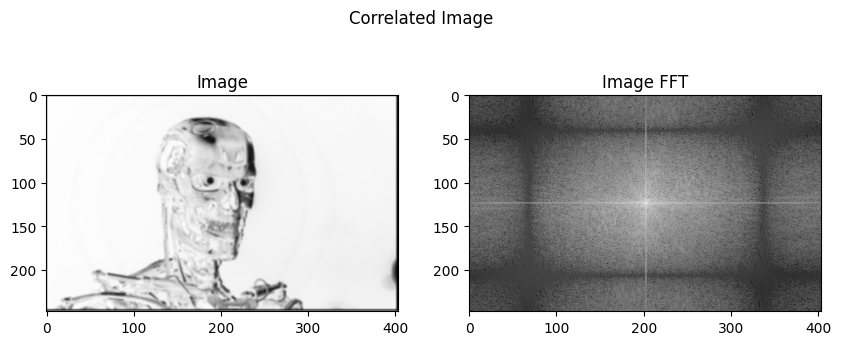

<Figure size 640x480 with 0 Axes>

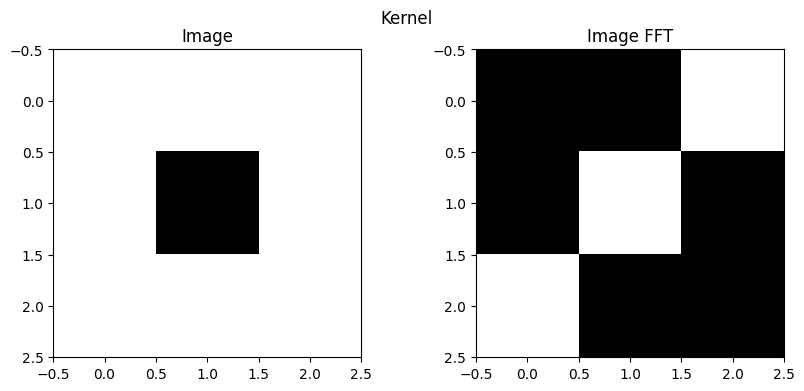

<Figure size 640x480 with 0 Axes>

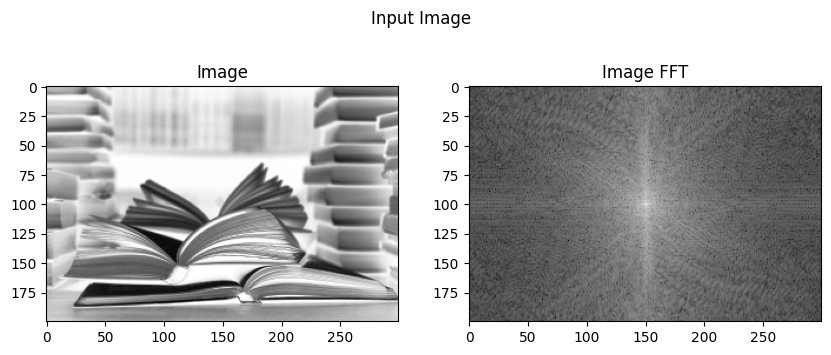

<Figure size 640x480 with 0 Axes>

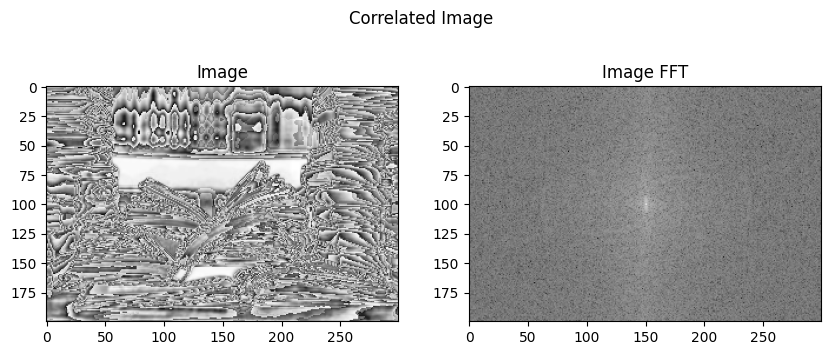

<Figure size 640x480 with 0 Axes>

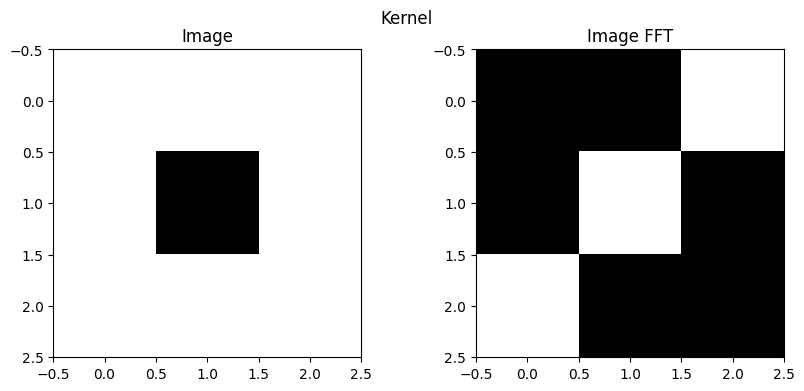

<Figure size 640x480 with 0 Axes>

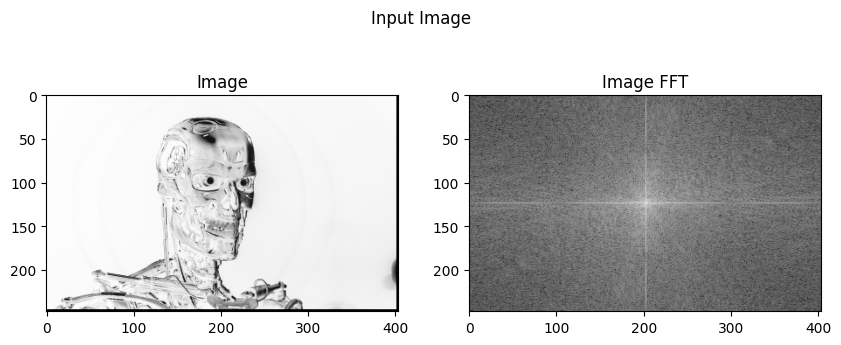

<Figure size 640x480 with 0 Axes>

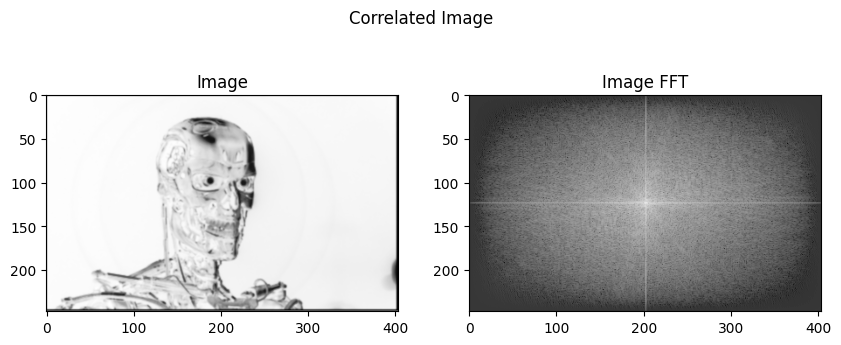

<Figure size 640x480 with 0 Axes>

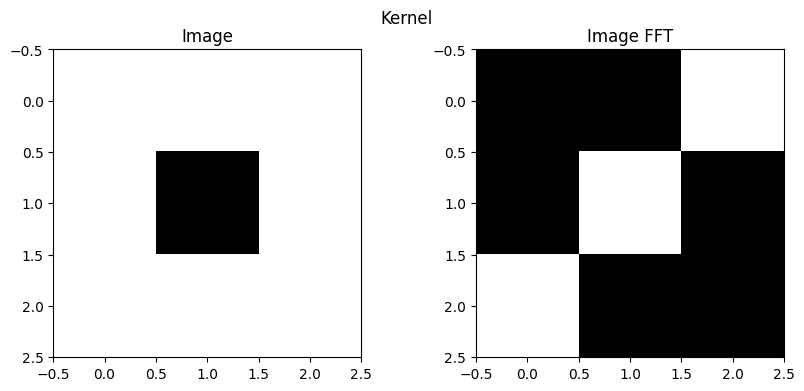

<Figure size 640x480 with 0 Axes>

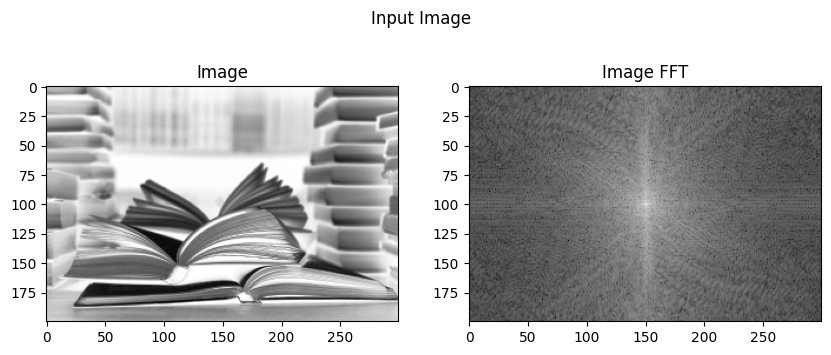

<Figure size 640x480 with 0 Axes>

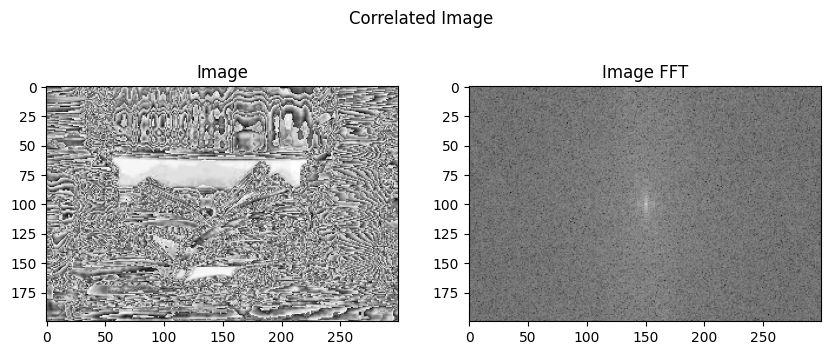

<Figure size 640x480 with 0 Axes>

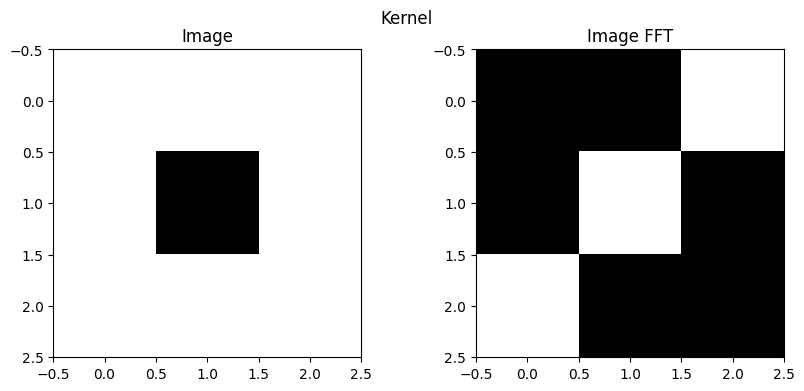

<Figure size 640x480 with 0 Axes>

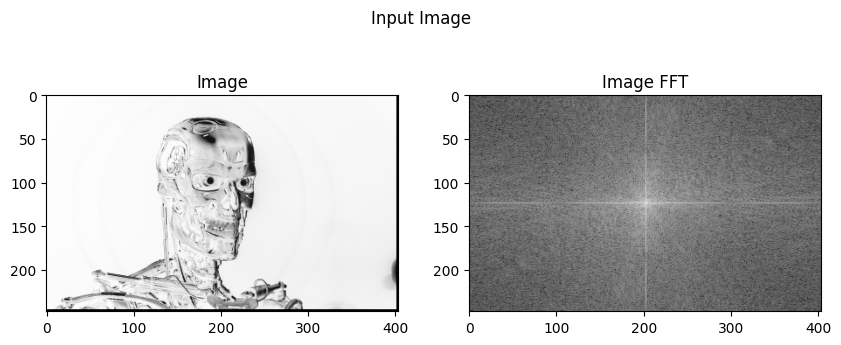

<Figure size 640x480 with 0 Axes>

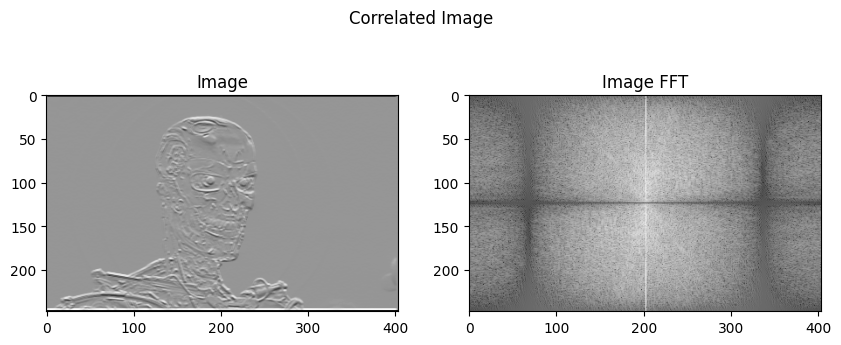

<Figure size 640x480 with 0 Axes>

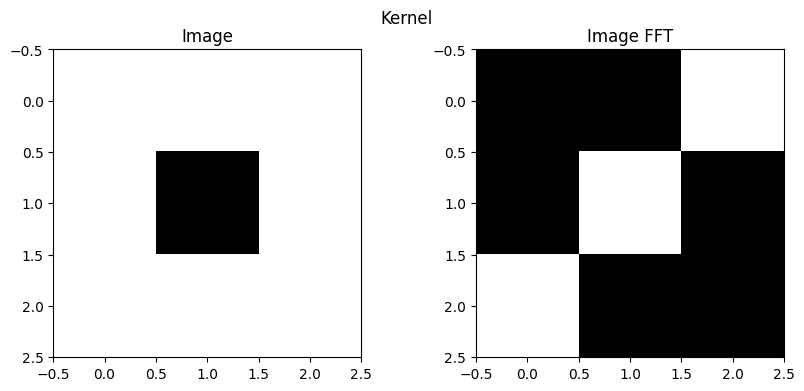

<Figure size 640x480 with 0 Axes>

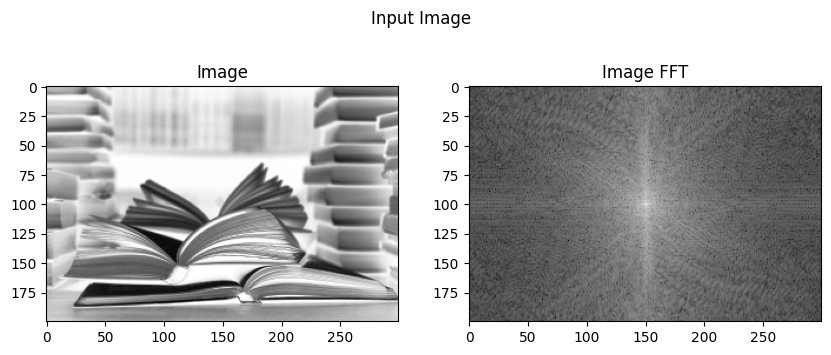

<Figure size 640x480 with 0 Axes>

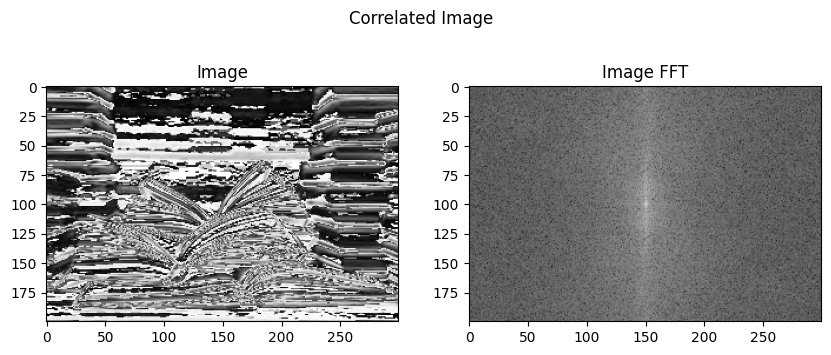

<Figure size 640x480 with 0 Axes>

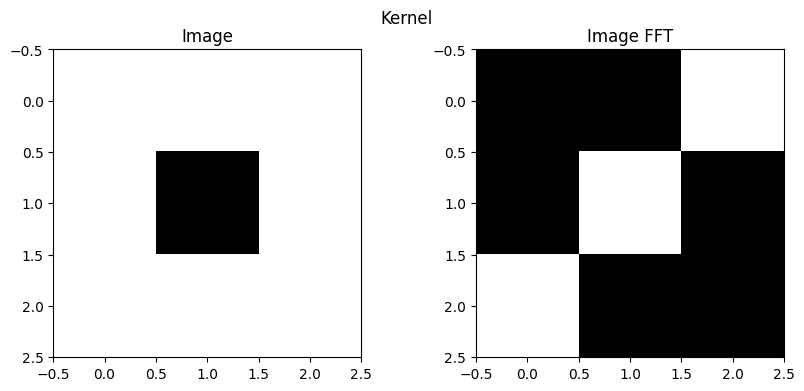

<Figure size 640x480 with 0 Axes>

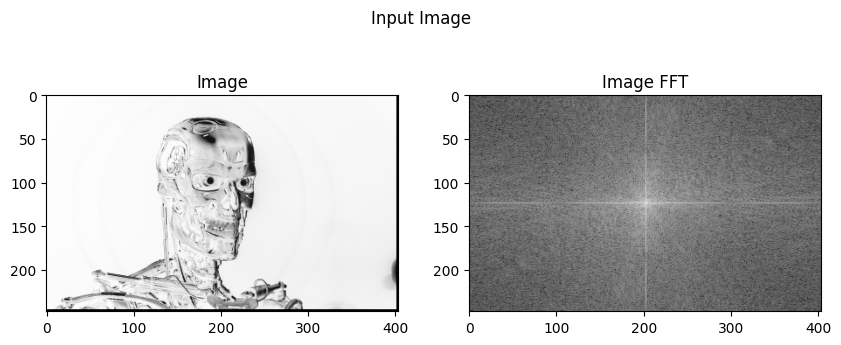

<Figure size 640x480 with 0 Axes>

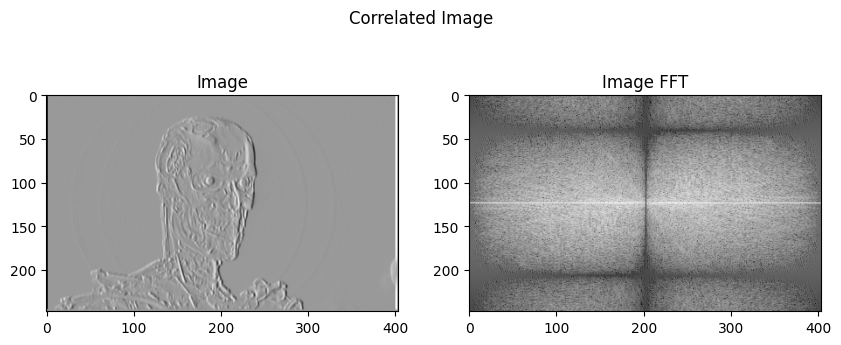

<Figure size 640x480 with 0 Axes>

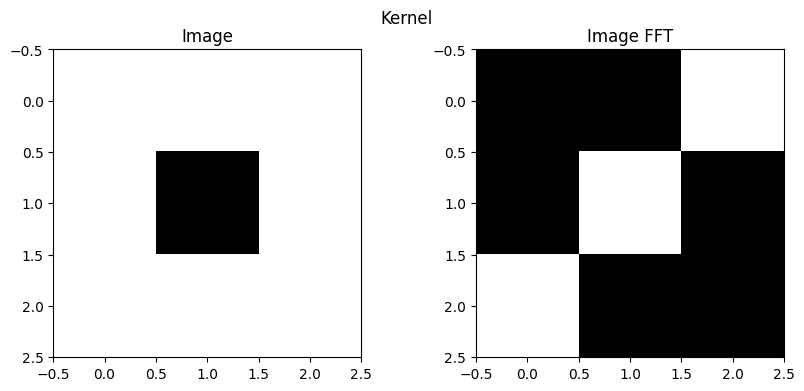

<Figure size 640x480 with 0 Axes>

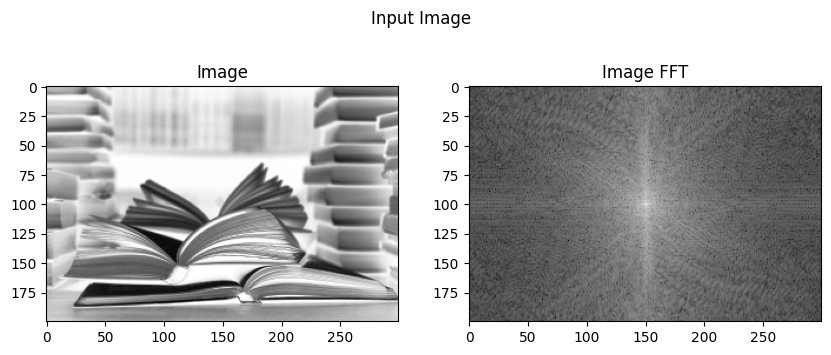

<Figure size 640x480 with 0 Axes>

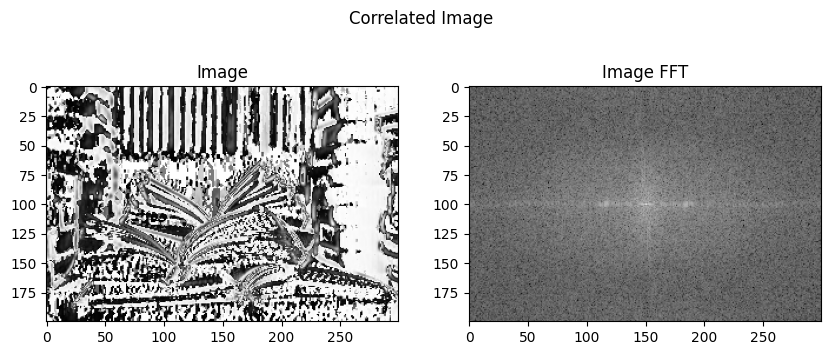

<Figure size 640x480 with 0 Axes>

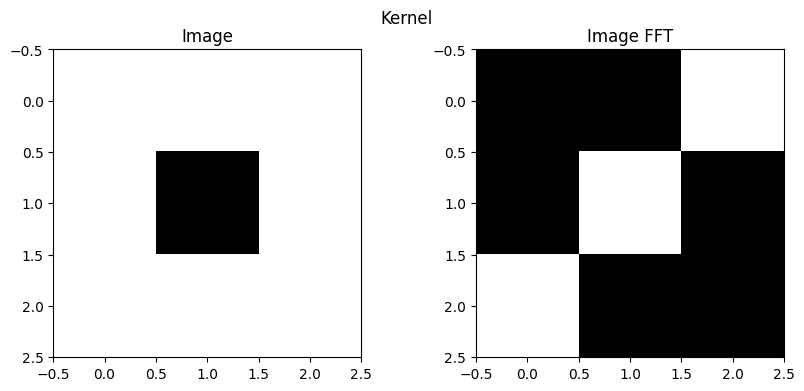

<Figure size 640x480 with 0 Axes>

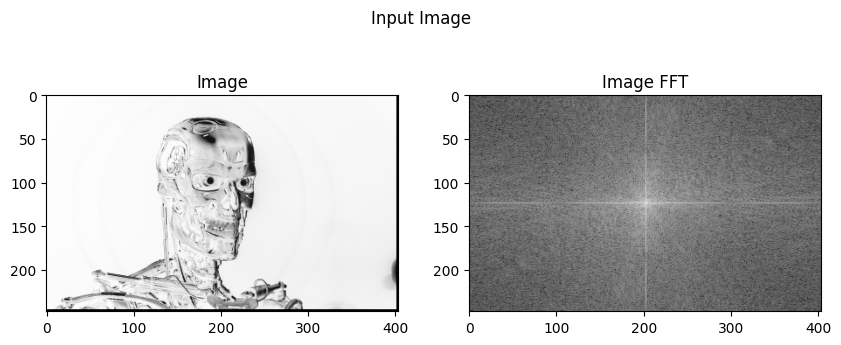

<Figure size 640x480 with 0 Axes>

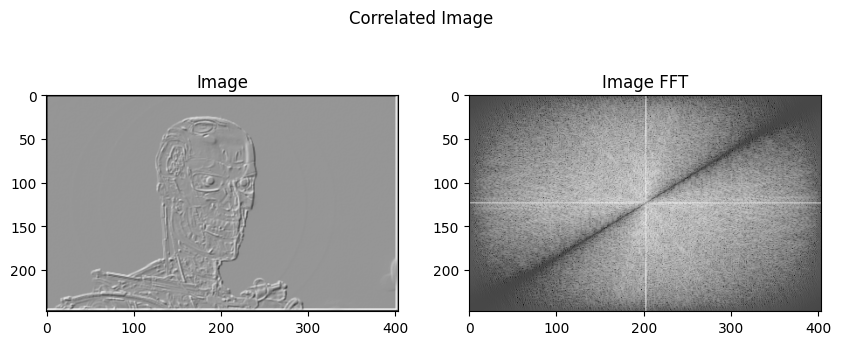

<Figure size 640x480 with 0 Axes>

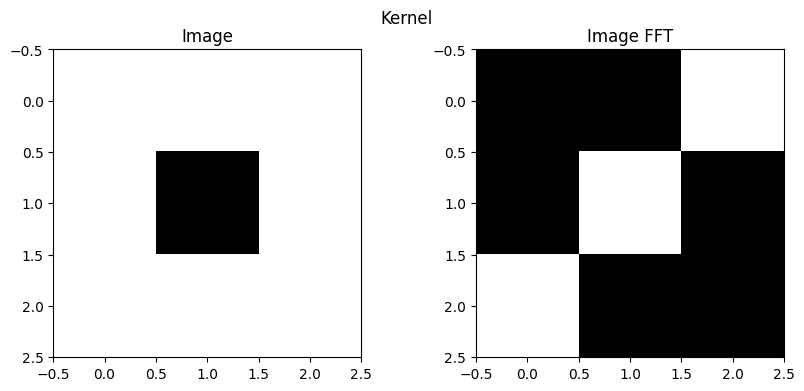

<Figure size 640x480 with 0 Axes>

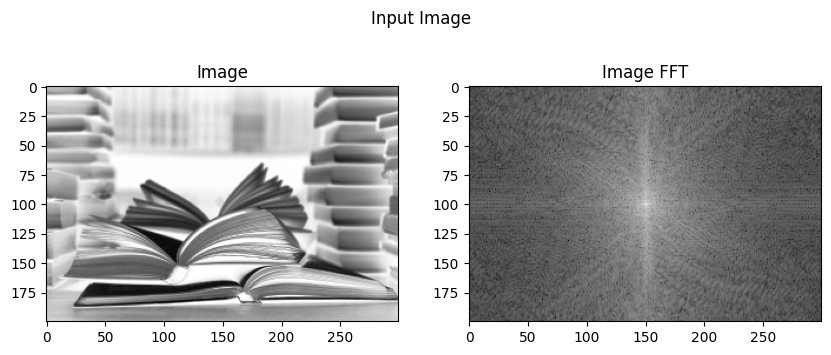

<Figure size 640x480 with 0 Axes>

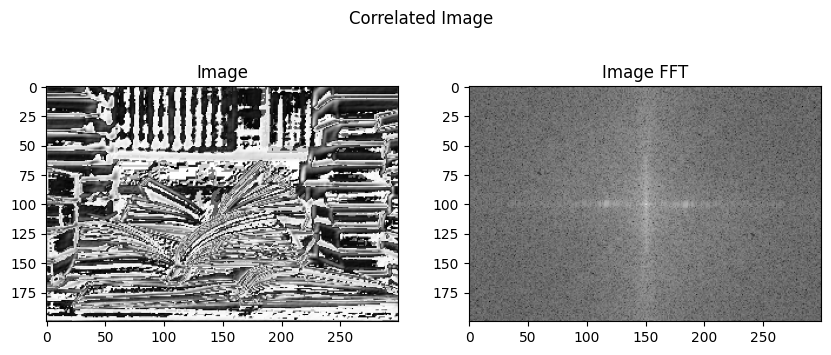

In [302]:
for Kernel in [nochange_kernel,box_kernal,gaussian_kernel,edge_H_kernel,edge_V_kernel,edge_D_kernel]:
    print(Kernel)
    corr=correlationFn(face, Kernel)
    corrbook=correlationFn(book, Kernel)



<Figure size 640x480 with 0 Axes>

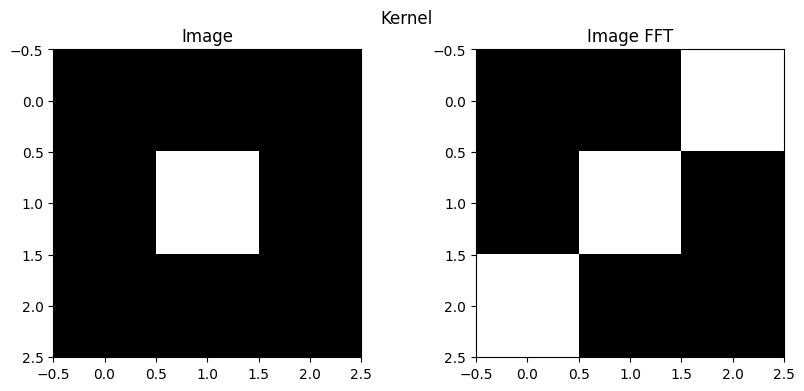

<Figure size 640x480 with 0 Axes>

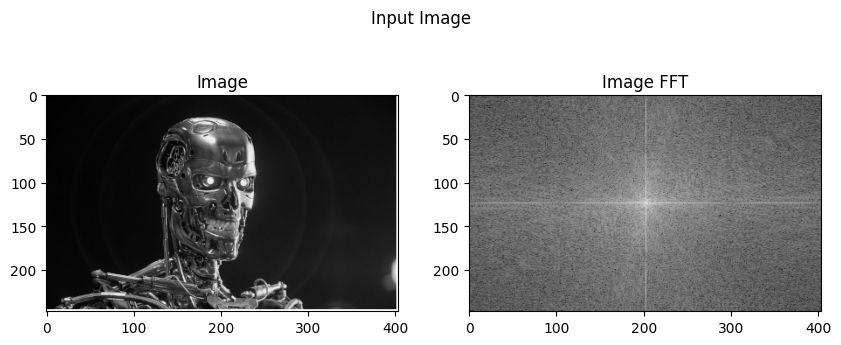

<Figure size 640x480 with 0 Axes>

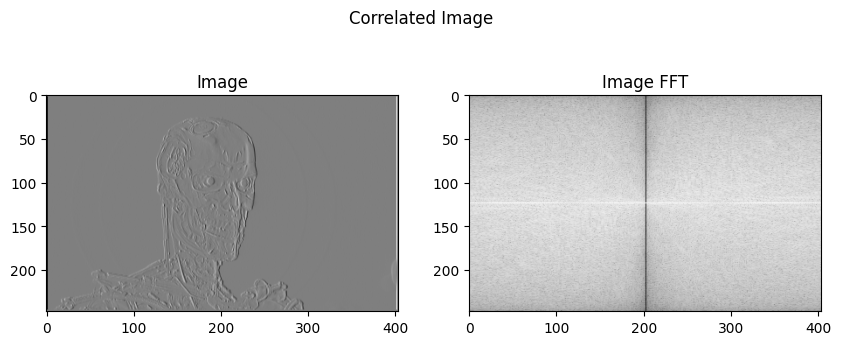

<Figure size 640x480 with 0 Axes>

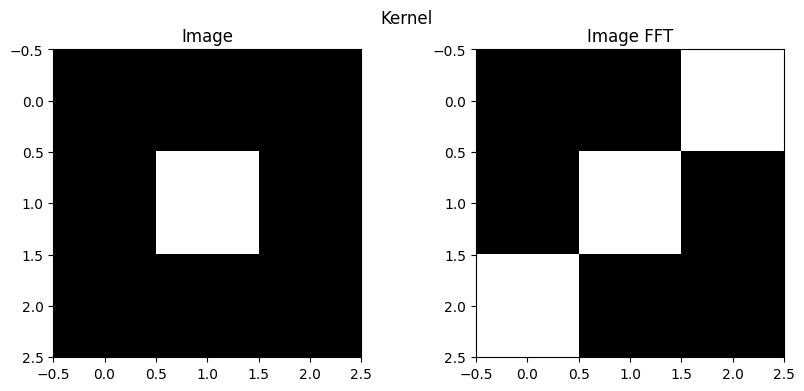

<Figure size 640x480 with 0 Axes>

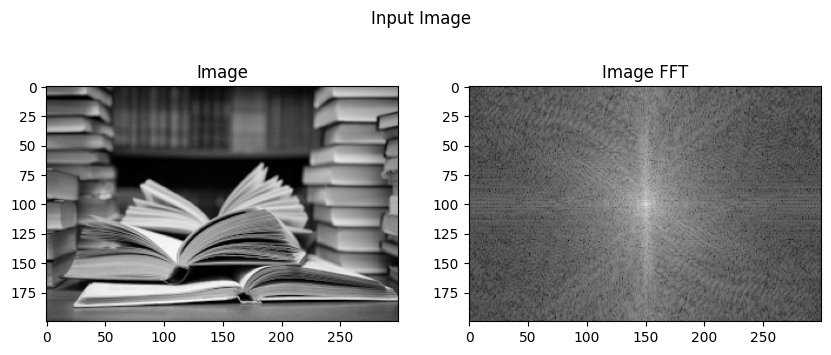

<Figure size 640x480 with 0 Axes>

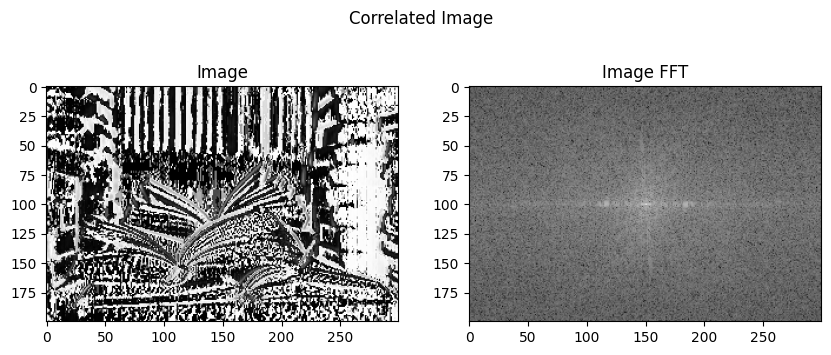

In [305]:

corr=correlationFn(face, np.array([-1,1,-1,1]).reshape(2,2))
corrbook=correlationFn(book, np.array([-1,1,-1,1]).reshape(2,2))


